In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.svm import SVR
import seaborn as sns

In [ ]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#check unique values in the column
print(df.apply(lambda col: col.unique().sum()))

Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

<Figure size 1080x1080 with 0 Axes>

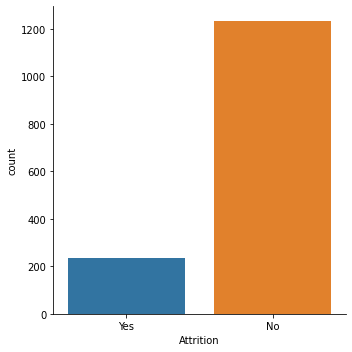

<Figure size 1080x1080 with 0 Axes>

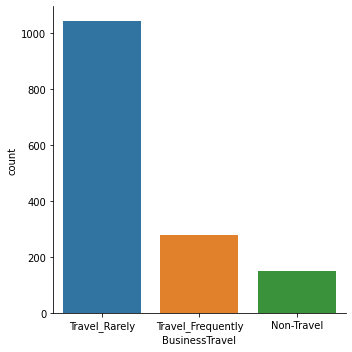

<Figure size 1080x1080 with 0 Axes>

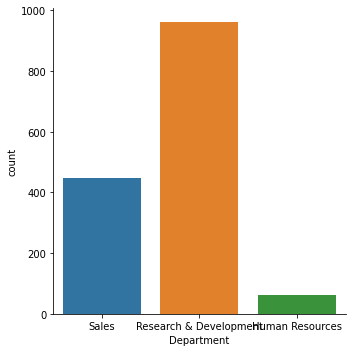

<Figure size 1080x1080 with 0 Axes>

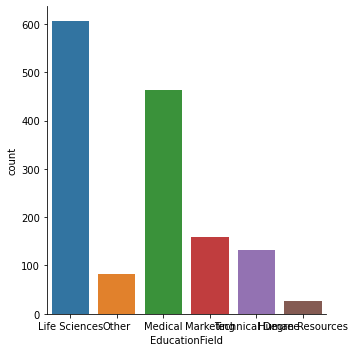

<Figure size 1080x1080 with 0 Axes>

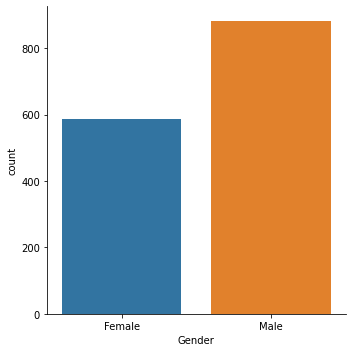

<Figure size 1080x1080 with 0 Axes>

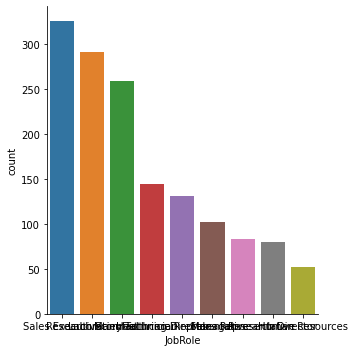

<Figure size 1080x1080 with 0 Axes>

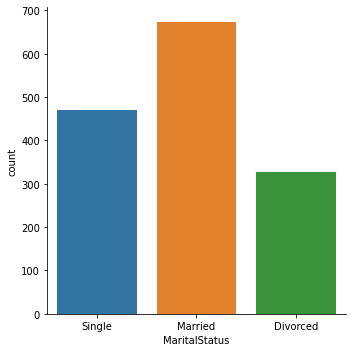

<Figure size 1080x1080 with 0 Axes>

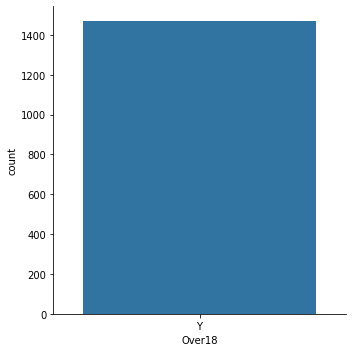

<Figure size 1080x1080 with 0 Axes>

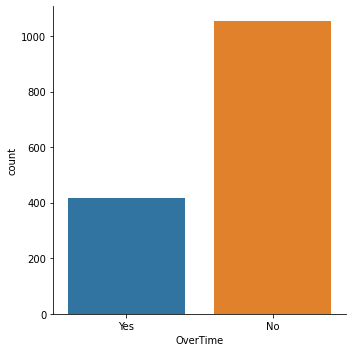

In [ ]:
cat_df=df.select_dtypes(include='object')

for i in cat_df:
    plt.figure(figsize=(15, 15))
    sns.catplot(data=df,x=i,kind='count')

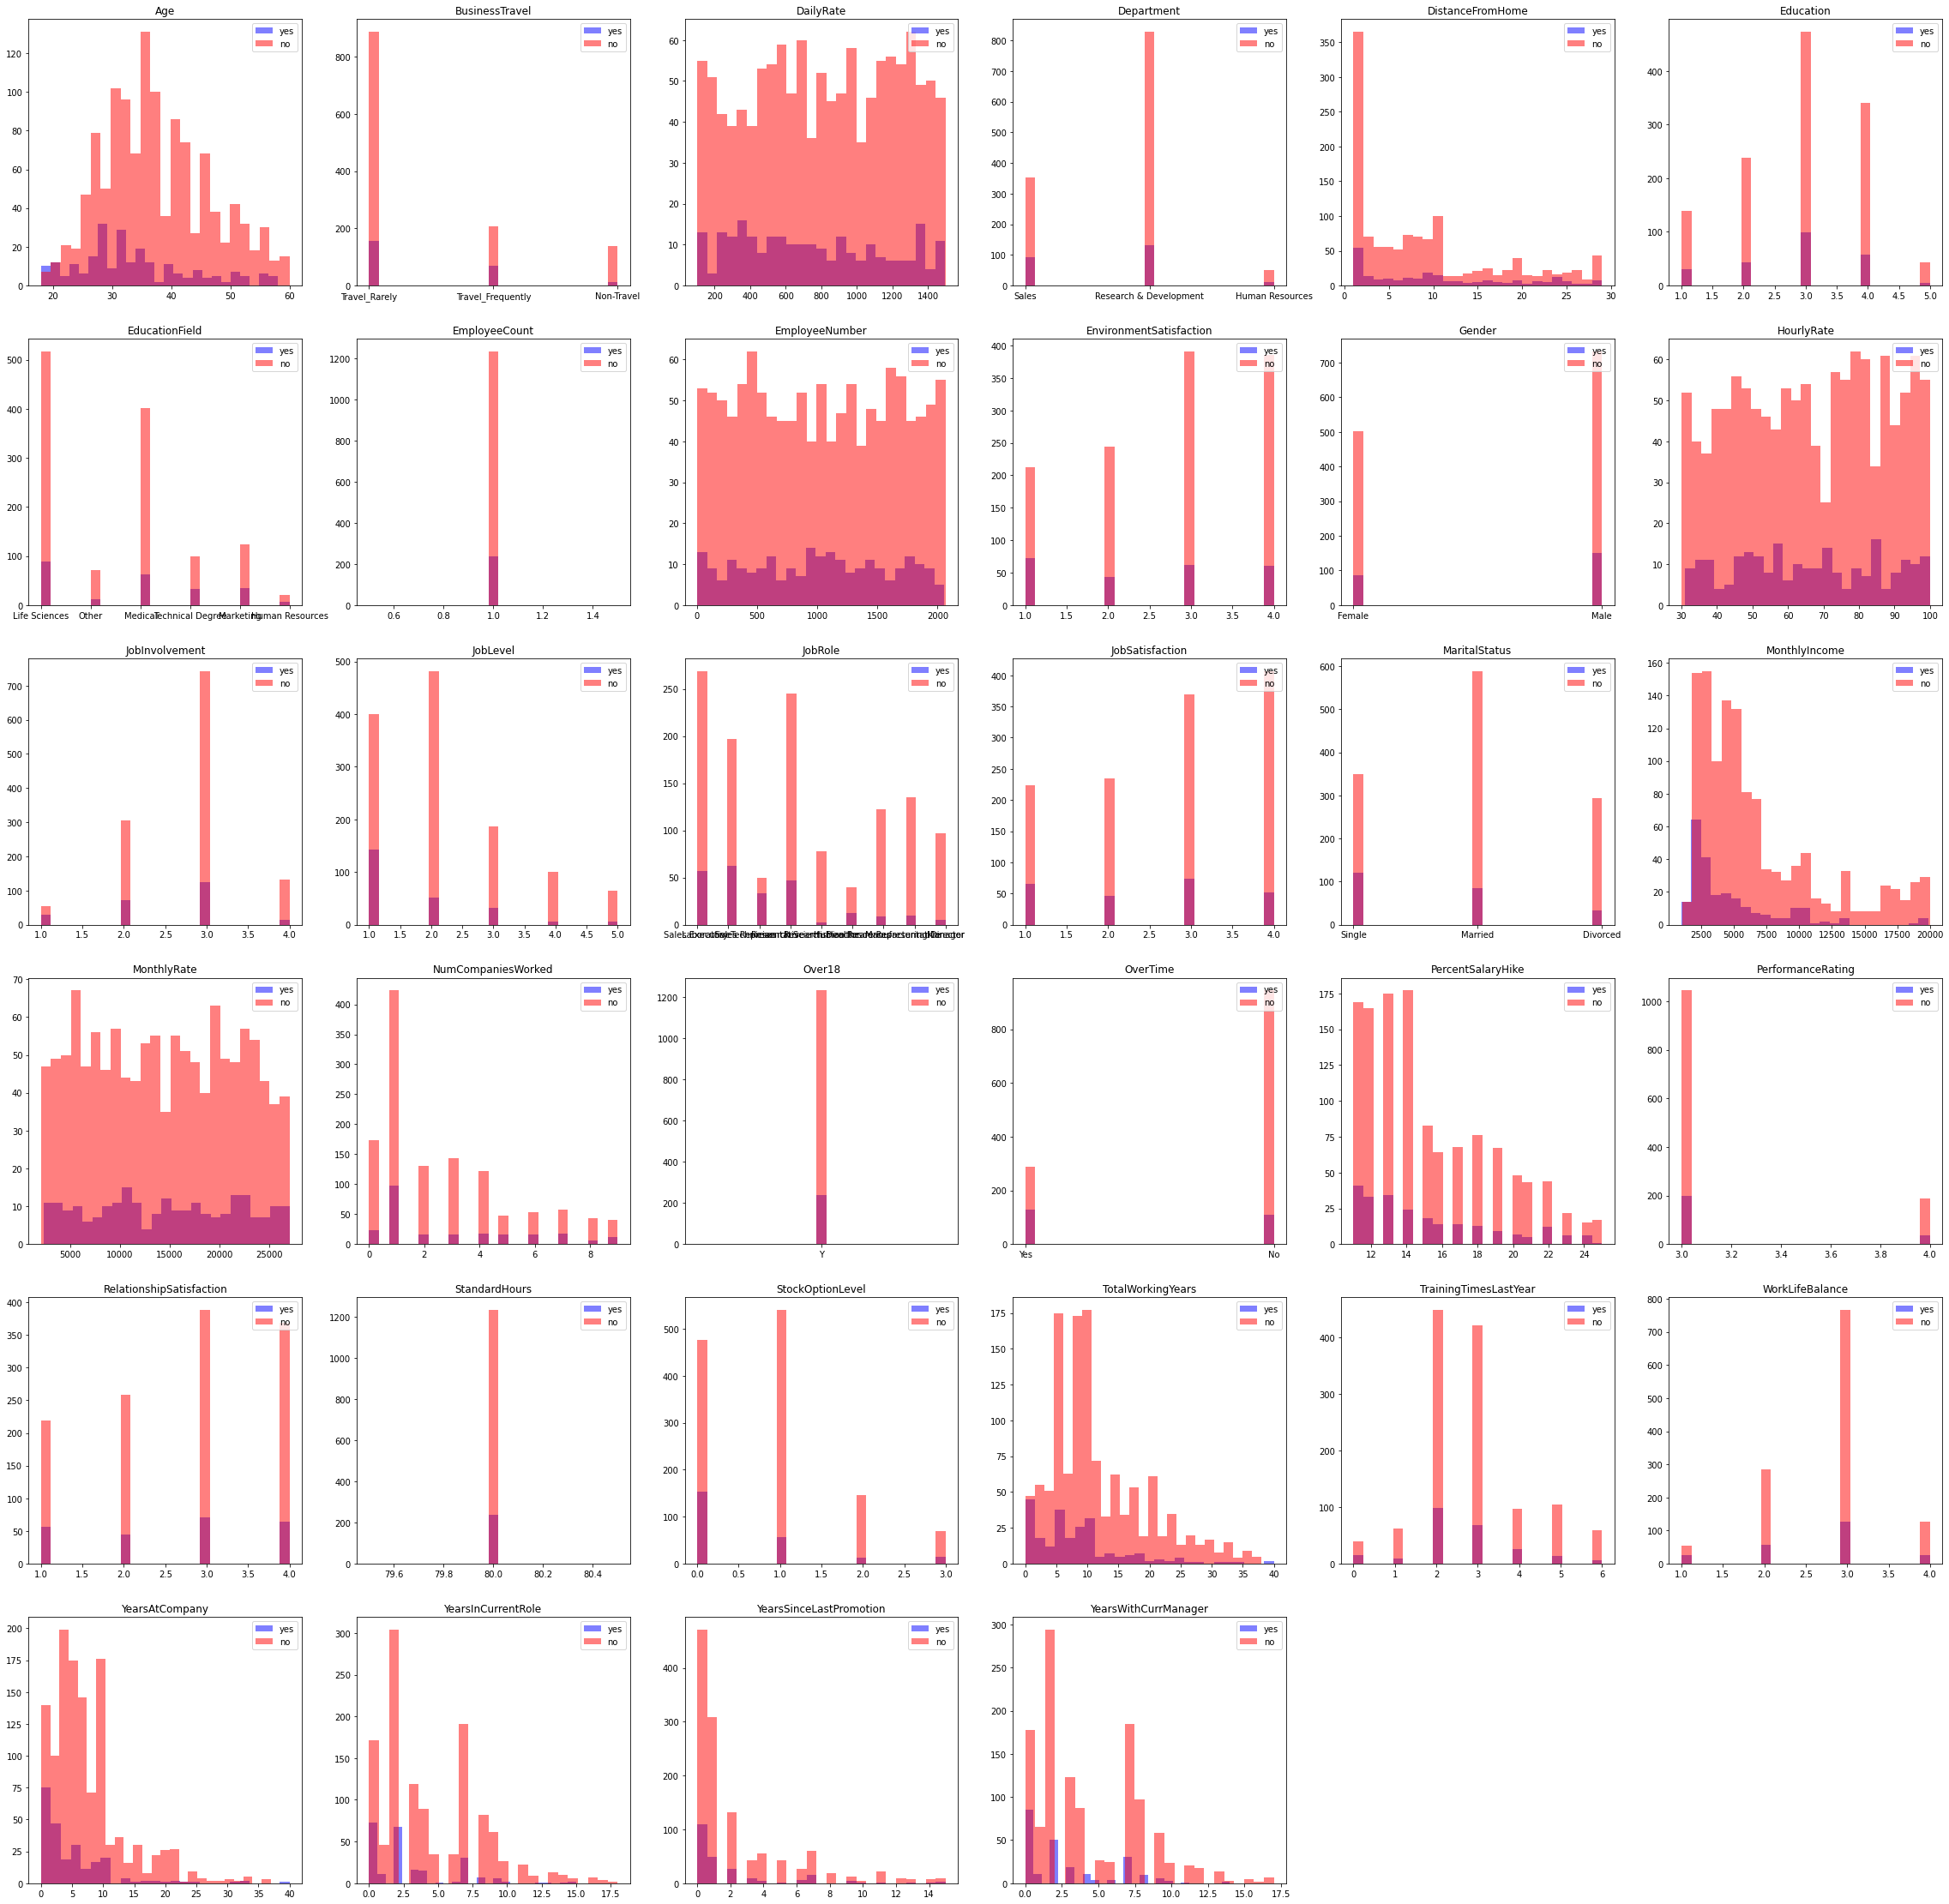

In [ ]:
#plot distributions
k=1
plt.figure(figsize=(40, 40))
for col in df:
  if col=="Attrition":
    continue
  yes = df[df['Attrition'] == 'Yes'][col]
  no = df[df['Attrition'] == 'No'][col]
  plt.subplot(6, 6, k)
  plt.hist(yes, bins=25, alpha=0.5, label='yes', color='b')
  plt.hist(no, bins=25, alpha=0.5, label='no', color='r')
  plt.legend(loc='upper right')
  plt.title(col)
  k+=1

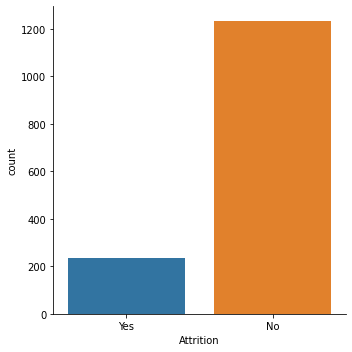

In [ ]:
sns.catplot(data=df,x="Attrition",kind='count')

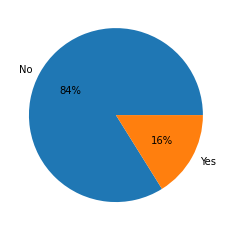

In [ ]:
# colors = sns.color_palette("husl", 2)
plt.pie(df['Attrition'].value_counts(),labels=['No','Yes'],autopct='%.0f%%')
plt.show()

Text(0.5, 1.0, 'Stacked Bar Chart of Job satisfaction vs attrition')

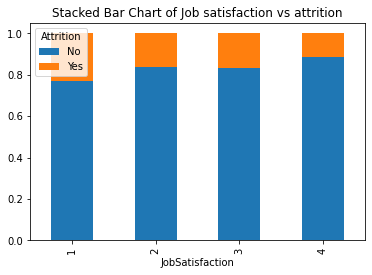

In [ ]:
table=pd.crosstab(df.JobSatisfaction, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job satisfaction vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Overtime vs attrition')

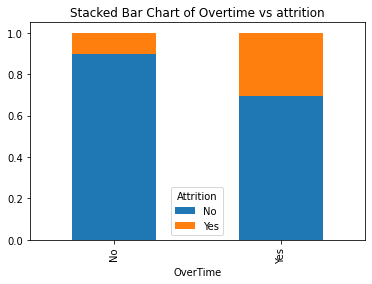

In [ ]:
table=pd.crosstab(df.OverTime, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Overtime vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Business Travel vs attrition')

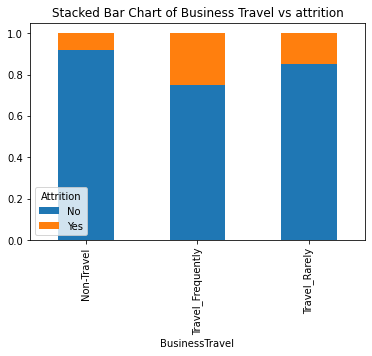

In [ ]:
table=pd.crosstab(df.BusinessTravel, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Business Travel vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Business Travel vs attrition')

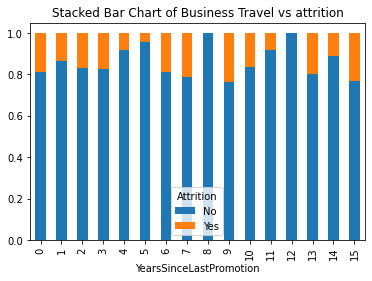

In [ ]:
table=pd.crosstab(df.YearsSinceLastPromotion, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Business Travel vs attrition')

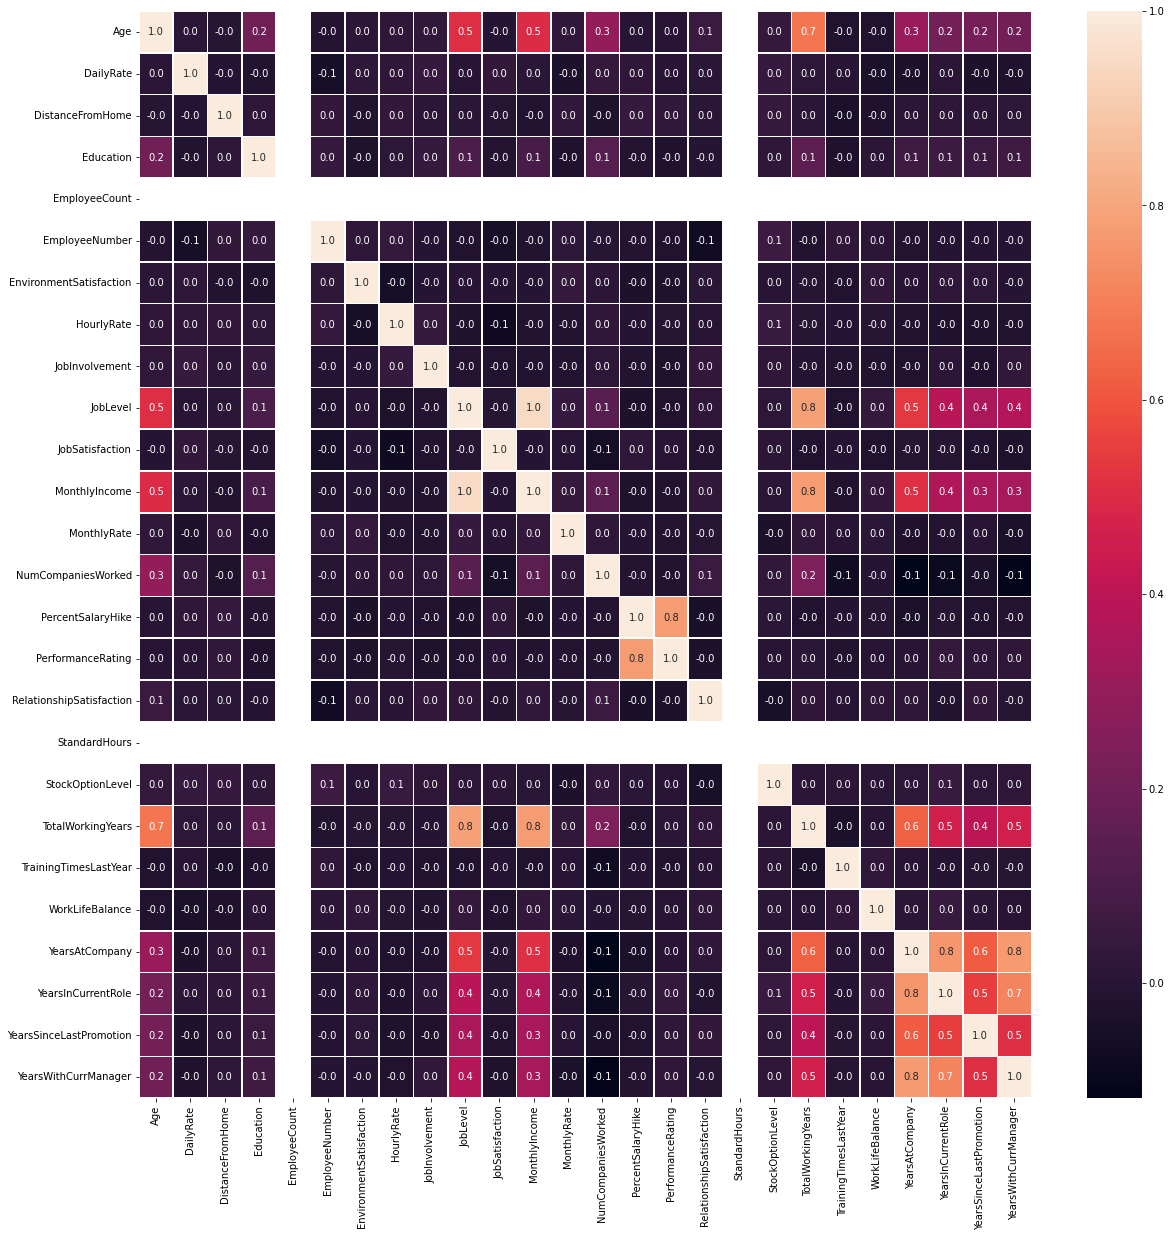

In [ ]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f')

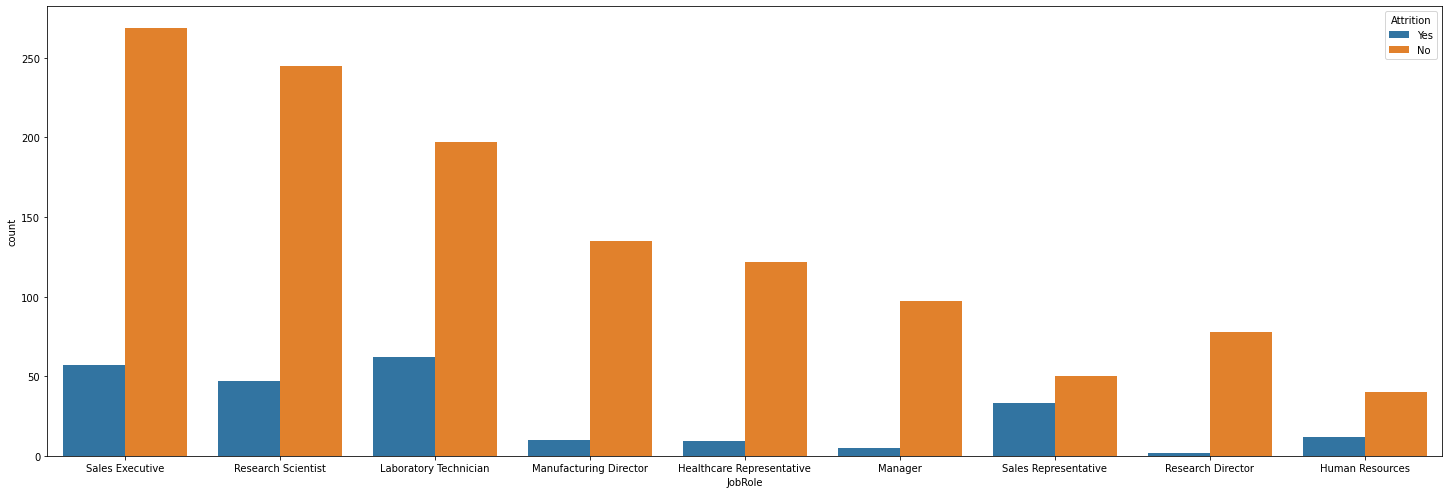

In [ ]:
a4_dims = (25, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=df,x="JobRole",hue="Attrition", ax=ax )